In [59]:
# Bibliotecas de importacao OHLC e an[alise de portf[olios e backtesting
import yfinance as yf
import vectorbt as vbt

# Bibliotecas graficas
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

##  Estratégia Fundamentalista 

In [60]:
## EScolhendo os melhores papeis baseado nos dividendos yeild 

In [61]:
## Conjunto de Dados
## Excluimos 19 ativos que não existiam na B3 no período inicial do estudo (2014-2018)
tickers_IBOV = ['ABEV3', 'ALPA4', 'AMER3', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3',
                'BEEF3', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'BRML3', 'CCRO3', 'CIEL3',
                'CMIG4', 'COGN3', 'CPFE3', 'CPLE6', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3',
                'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3',
                'ENGI11', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HYPE3',
                'ITSA4', 'ITUB4', 'JBSS3', 'JHSF3', 'LCAM3', 'LREN3', 'MGLU3', 'MRFG3',
                'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'POSI3', 'PRIO3', 'QUAL3',
                'RADL3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11', 'SUZB3', 'TAEE11', 'TIMS3',
                'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']# List comprehension (adicionar '.SA' usando um loop em todos os tickers da lista para extrair do YF)


# Adicionando .SA no final de cada papel pois é assim que são representados no yfinance
tickers_IBOV_yf = [x + '.SA' for x in tickers_IBOV]
tickers_IBOV_yf[0:10]

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAN4.SA']

## 2.2. Estratégia focada em Dividendos

OBJETIVO: Ao final de 2018, selecionar os dez maiores pagadores de dividendos nos 5 anos anteriores até aquele momento (2014-2018). Posteriormente e depois comparar com o retorno do IBOVESPA em uma estratégia Buy & Hold e 2019 a 2021.

Vamos realizar essa comparação utilizando o DY em janelas móveis.


In [62]:
##Dividend yield (DY) = Soma dos dividendos pagos por ação em 1 ano / Preço da ação * 100**

Vamos seguir a seguinte fórmula:


  $SOMA_{DIV} = \text{Soma dos dividendos pagos em um ano}$
  <br>
  <br>
  $Preco_{Atual} = \text{Preço do papel no momento do cálculo do DY}$
  <br>
  <br>
  <br>

  $\text{Dividend Yield (DY)} = \frac{SOMA_{DIV}}{Preco_{Atual}}\,*100$

In [63]:
# Download dos dividendos utilizando a integração entre VectorBT e YF

div_dez_mais = vbt.YFData.download(tickers_IBOV_yf, start='2014-01-01 BRT', end='2018-12-31 BRT').get('Dividends')

In [64]:
div_dez_mais.head()

symbol                     ABEV3.SA  ALPA4.SA  AMER3.SA  B3SA3.SA  BBAS3.SA  \
Date                                                                          
2014-01-02 00:00:00+00:00       0.0       0.0         0       0.0       0.0   
2014-01-03 00:00:00+00:00       0.0       0.0         0       0.0       0.0   
2014-01-06 00:00:00+00:00       0.0       0.0         0       0.0       0.0   
2014-01-07 00:00:00+00:00       0.0       0.0         0       0.0       0.0   
2014-01-08 00:00:00+00:00       0.0       0.0         0       0.0       0.0   

symbol                     BBDC3.SA  BBDC4.SA  BBSE3.SA  BEEF3.SA  BPAN4.SA  \
Date                                                                          
2014-01-02 00:00:00+00:00  0.000000       0.0       0.0       0.0       0.0   
2014-01-03 00:00:00+00:00  0.007339       0.0       0.0       0.0       0.0   
2014-01-06 00:00:00+00:00  0.000000       0.0       0.0       0.0       0.0   
2014-01-07 00:00:00+00:00  0.000000       0.0       0.0       0.0       0.0   
2014-01-08 00:00:00+00:00  0.000000       0.0       0.0       0.0       0.0   

symbol                     ...  TAEE11.SA  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
Date                       ...                                            
2014-01-02 00:00:00+00:00  ...        0.0       0.0       0.0       0.0   
2014-01-03 00:00:00+00:00  ...        0.0       0.0       0.0       0.0   
2014-01-06 00:00:00+00:00  ...        0.0       0.0       0.0       0.0   
2014-01-07 00:00:00+00:00  ...        0.0       0.0       0.0       0.0   
2014-01-08 00:00:00+00:00  ...        0.0       0.0       0.0       0.0   

symbol                     USIM5.SA  VALE3.SA  VIIA3.SA  VIVT3.SA  WEGE3.SA  \
Date                                                                          
2014-01-02 00:00:00+00:00       0.0       0.0       0.0  0.634675       0.0   
2014-01-03 00:00:00+00:00       0.0       0.0       0.0  0.000000       0.0   
2014-01-06 00:00:00+00:00       0.0       0.0       0.0  0.000000       0.0   
2014-01-07 00:00:00+00:00       0.0       0.0       0.0  0.000000       0.0   
2014-01-08 00:00:00+00:00       0.0       0.0       0.0  0.000000       0.0   

symbol                     YDUQ3.SA  
Date                                 
2014-01-02 00:00:00+00:00       0.0  
2014-01-03 00:00:00+00:00       0.0  
2014-01-06 00:00:00+00:00       0.0  
2014-01-07 00:00:00+00:00       0.0  
2014-01-08 00:00:00+00:00       0.0  

[5 rows x 72 columns]

In [65]:
# Vamos calcular a soma de dividendos em uma janela de 365 dias (DY 12M)
# Importante colocar o "365D" como string e não integer (contaria linhas e nao dias)

div_dez_mais_12M = div_dez_mais.rolling('365D').sum()
div_dez_mais_12M

symbol                     ABEV3.SA  ALPA4.SA  AMER3.SA  B3SA3.SA  BBAS3.SA  \
Date                                                                          
2014-01-02 00:00:00+00:00      0.00  0.000000       0.0  0.000000  0.000000   
2014-01-03 00:00:00+00:00      0.00  0.000000       0.0  0.000000  0.000000   
2014-01-06 00:00:00+00:00      0.00  0.000000       0.0  0.000000  0.000000   
2014-01-07 00:00:00+00:00      0.00  0.000000       0.0  0.000000  0.000000   
2014-01-08 00:00:00+00:00      0.00  0.000000       0.0  0.000000  0.000000   
...                             ...       ...       ...       ...       ...   
2018-12-20 00:00:00+00:00      0.55  0.377027       0.0  0.252195  1.516253   
2018-12-21 00:00:00+00:00      0.55  0.377027       0.0  0.252195  1.516253   
2018-12-26 00:00:00+00:00      0.55  0.377027       0.0  0.234043  1.516253   
2018-12-27 00:00:00+00:00      0.55  0.377027       0.0  0.234043  1.516253   
2018-12-28 00:00:00+00:00      0.55  0.377027       0.0  0.234043  1.516253   

symbol                     BBDC3.SA  BBDC4.SA  BBSE3.SA  BEEF3.SA  BPAN4.SA  \
Date                                                                          
2014-01-02 00:00:00+00:00  0.000000  0.000000  0.000000       0.0  0.000000   
2014-01-03 00:00:00+00:00  0.007339  0.000000  0.000000       0.0  0.000000   
2014-01-06 00:00:00+00:00  0.007339  0.000000  0.000000       0.0  0.000000   
2014-01-07 00:00:00+00:00  0.007339  0.000000  0.000000       0.0  0.000000   
2014-01-08 00:00:00+00:00  0.007339  0.000000  0.000000       0.0  0.000000   
...                             ...       ...       ...       ...       ...   
2018-12-20 00:00:00+00:00  0.664058  0.730464  3.097978       0.0  0.061131   
2018-12-21 00:00:00+00:00  0.664058  0.730464  3.097978       0.0  0.061131   
2018-12-26 00:00:00+00:00  0.650249  0.715273  3.097978       0.0  0.061131   
2018-12-27 00:00:00+00:00  0.650249  0.715273  3.097978       0.0  0.061131   
2018-12-28 00:00:00+00:00  0.650249  0.715273  3.097978       0.0  0.061131   

symbol                     ...  TAEE11.SA  TIMS3.SA  TOTS3.SA  UGPA3.SA  \
Date                       ...                                            
2014-01-02 00:00:00+00:00  ...    0.00000  0.000000  0.000000  0.000000   
2014-01-03 00:00:00+00:00  ...    0.00000  0.000000  0.000000  0.000000   
2014-01-06 00:00:00+00:00  ...    0.00000  0.000000  0.000000  0.000000   
2014-01-07 00:00:00+00:00  ...    0.00000  0.000000  0.000000  0.000000   
2014-01-08 00:00:00+00:00  ...    0.00000  0.000000  0.000000  0.000000   
...                        ...        ...       ...       ...       ...   
2018-12-20 00:00:00+00:00  ...    2.78725  0.236897  0.112839  0.336329   
2018-12-21 00:00:00+00:00  ...    2.78725  0.236897  0.112839  0.336329   
2018-12-26 00:00:00+00:00  ...    2.78725  0.236897  0.112839  0.336329   
2018-12-27 00:00:00+00:00  ...    2.78725  0.236897  0.112839  0.336329   
2018-12-28 00:00:00+00:00  ...    2.78725  0.236897  0.077429  0.336329   

symbol                     USIM5.SA  VALE3.SA  VIIA3.SA  VIVT3.SA  WEGE3.SA  \
Date                                                                          
2014-01-02 00:00:00+00:00  0.000000  0.000000  0.000000  0.634675  0.000000   
2014-01-03 00:00:00+00:00  0.000000  0.000000  0.000000  0.634675  0.000000   
2014-01-06 00:00:00+00:00  0.000000  0.000000  0.000000  0.634675  0.000000   
2014-01-07 00:00:00+00:00  0.000000  0.000000  0.000000  0.634675  0.000000   
2014-01-08 00:00:00+00:00  0.000000  0.000000  0.000000  0.634675  0.000000   
...                             ...       ...       ...       ...       ...   
2018-12-20 00:00:00+00:00  0.047531  2.388785  0.011935  4.264345  0.132196   
2018-12-21 00:00:00+00:00  0.047531  2.388785  0.011935  4.264345  0.132196   
2018-12-26 00:00:00+00:00  0.047531  1.968873  0.011935  4.264345  0.157902   
2018-12-27 00:00:00+00:00  0.047531  1.968873  0.011935  3.438723  0.157902   
2018-12-28 00:00:00+

Utilizaremos a coluna de **Close** pois ela reflete o preço nominal, onde o valor dos dividendos pagos é descontado do preço das ações

Repare que não estamos usando o **Adjusted Close**, pois esse já carrega a correção para o reinvestimento dos dividendos no papel, o que traria uma distorção já que estamos usando esse preço **apenas** para calcular o dividend yield, e esta métrica já traz a soma dos dividendos pagos no numerador.

In [66]:
close_todo_IBOV = yf.download(tickers_IBOV_yf, start = '2014-01-01', end = '2018-12-31')['Close']

[*********************100%***********************]  72 of 72 completed


Agora precisamos garantir que o índice (index) dos dois dataframes criados estão ambos no mesmo formato e data e mesmo fuso horário. Se não fizéssemos isso, teríamos problemas na hora de fazer operações com os dois dataframes juntos.

In [67]:
import datetime
div_dez_mais_12M.index = pd.to_datetime(div_dez_mais_12M.index, utc=True)

close_todo_IBOV.index = pd.to_datetime(close_todo_IBOV.index, utc=True)

In [68]:
# Calculando a evolução temporal do DY entre 2014 a 2018
# Interessante para observamos o quão consistente foi o DY de cada ativo ao longo do tempo

In [69]:
DY_12M = div_dez_mais_12M/close_todo_IBOV*100

In [70]:
# Lineplot simples da vbt para visualizar o DY ao longo dos anos

DY_12M.vbt.plot(width = 1000, height = 500).show()

In [71]:
DY_12M.mean().sort_values(ascending=False)

symbol
CMIG4.SA     9.400959
TAEE11.SA    9.052022
EZTC3.SA     7.611461
SANB11.SA    6.861383
ECOR3.SA     6.337115
               ...   
PRIO3.SA     0.000000
MRFG3.SA     0.000000
GOLL4.SA     0.000000
AMER3.SA     0.000000
ENEV3.SA     0.000000
Length: 72, dtype: float64

In [72]:
mediaDY = pd.DataFrame(DY_12M.mean().sort_values(ascending=False))

In [73]:
# Barplot simples da VectorBT para visualizar o DY entre todos os ativos

pd.DataFrame(mediaDY).vbt.barplot().show()

In [74]:
##Vamos selecionar agora os 10 papéis com maiores médias de dividend yield
papeis = mediaDY.head(10)

In [75]:
papeis

0
symbol             
CMIG4.SA   9.400959
TAEE11.SA  9.052022
EZTC3.SA   7.611461
SANB11.SA  6.861383
ECOR3.SA   6.337115
VIVT3.SA   6.010745
BRAP4.SA   5.893771
ELET6.SA   5.749759
CPLE6.SA   5.745979
QUAL3.SA   5.608449

In [76]:
 # Vamos criar uma lista contendo apenas o índice (index) do dataframe anterior
 # Ou seja, traz os tickers selecionados
 
 lista_dy = list(papeis.index)

### **Simulação**

Vamos dar início a nossa simulação de fato.

Vamos obter os dados do período seguinte (2019 a 2021), onde o nosso gestor fictício implementou a sua estratégia.

Qual teria sido a sua performance?

### **Simulação**

Vamos dar início a nossa simulação de fato.

Vamos obter os dados do período seguinte (2019 a 2021), onde o nosso gestor fictício implementou a sua estratégia.

Qual teria sido a sua performance?

In [77]:
close_todo_IBOV = vbt.YFData.download(lista_dy, start = '2019-01-01', end='2021-12-31').get('Close')

/home/cris/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

/home/cris/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html

/home/cris/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning:

The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.

In [78]:
close_todo_IBOV.head()

symbol                     CMIG4.SA  TAEE11.SA   EZTC3.SA  SANB11.SA  \
Date                                                                   
2019-01-02 00:00:00+00:00  7.133732  17.365871  19.778906  36.453136   
2019-01-03 00:00:00+00:00  6.984073  17.416090  19.840286  37.656559   
2019-01-04 00:00:00+00:00  6.914233  18.104696  19.763563  37.616714   
2019-01-07 00:00:00+00:00  6.709700  17.803429  19.356937  38.246311   
2019-01-08 00:00:00+00:00  6.674779  17.789083  19.073065  37.964561   

symbol                     ECOR3.SA   VIVT3.SA   BRAP4.SA   ELET6.SA  \
Date                                                                   
2019-01-02 00:00:00+00:00      9.72  31.857538  17.850548  24.648285   
2019-01-03 00:00:00+00:00      9.92  31.469864  17.167299  26.130545   
2019-01-04 00:00:00+00:00      9.96  31.234217  18.327099  25.947170   
2019-01-07 00:00:00+00:00      9.84  31.317827  18.470636  24.831657   
2019-01-08 00:00:00+00:00      9.82  30.633711  18.338581  25.664473   

symbol                     CPLE6.SA   QUAL3.SA  
Date                                            
2019-01-02 00:00:00+00:00  2.171913  11.491384  
2019-01-03 00:00:00+00:00  2.196553  11.558784  
2019-01-04 00:00:00+00:00  2.124039  11.356588  
2019-01-07 00:00:00+00:00  2.146568  11.019597  
2019-01-08 00:00:00+00:00  2.182472  11.204943

Para iniciar nossa simulação, vamos supor que tivéssemos investido um valor "X" nesta carteira de tal forma que cada papel representasse inicialmente 10%.

Ou seja, se tivéssemos 100.000,00, teríamos colocado 10.000,00 em cada papel.

Para simplificar, **não** faremos rebalanceamento. Ou seja, será feito apenas um aporte no primeiro dia e depois a carteira seguirá "naturalmente", sem nenhuma alteração nas suas posições, sem compras ou vendas adicionais.

In [79]:
#Criei uma lista com 10% pra cada

alocacao = pd.DataFrame.vbt.empty_like(close_todo_IBOV, fill_value=np.nan)
alocacao.iloc[0] = [0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]

In [80]:
# Portfolio de Dividendos port_dy composto de 10 ações com 10% de alocaçao cada com um caixa de 10000

port_dy = vbt.Portfolio.from_orders(
    close = close_todo_IBOV,
    size = alocacao,
    size_type = 'targetpercent',
    group_by = True,
    cash_sharing = True,
    init_cash = None,
    freq = 'd'
)

In [81]:
port_dy.stats(settings = dict(risk_free = 0, freq = 'd'))

Start                         2019-01-02 00:00:00+00:00
End                           2021-12-30 00:00:00+00:00
Period                                743 days 00:00:00
Start Value                                       100.0
End Value                                    140.710821
Total Return [%]                              40.710821
Benchmark Return [%]                          40.710821
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              45.211201
Max Drawdown Duration                 479 days 00:00:00
Total Trades                                         10
Total Closed Trades                                   0
Total Open Trades                                    10
Open Trade PnL                                40.710821
Win Rate [%]                                        NaN
Best Trade [%]                                      NaN
Worst Trade [%]                                 

In [82]:
port_dy.stats(settings = dict(risk_free = 0, freq = 'd'))

Start                         2019-01-02 00:00:00+00:00
End                           2021-12-30 00:00:00+00:00
Period                                743 days 00:00:00
Start Value                                       100.0
End Value                                    140.710821
Total Return [%]                              40.710821
Benchmark Return [%]                          40.710821
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              45.211201
Max Drawdown Duration                 479 days 00:00:00
Total Trades                                         10
Total Closed Trades                                   0
Total Open Trades                                    10
Open Trade PnL                                40.710821
Win Rate [%]                                        NaN
Best Trade [%]                                      NaN
Worst Trade [%]                                 

**Resultados do portfólio baseado no DY**


In [83]:
port_dy.plot().show()

/home/cris/anaconda3/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'orders' does not support grouped data

/home/cris/anaconda3/lib/python3.9/site-packages/vectorbt/generic/plots_builder.py:339: UserWarning:

Subplot 'trade_pnl' does not support grouped data



In [84]:
port_dy.drawdowns.plot(top_n = 3).show()

In [85]:
port_dy.plot_underwater().show()

## Criação de uma lista com os ativos selecionados

In [86]:
ativos = list(papeis.index)

In [87]:
inicio = '2019-01-01'
fim = '2022-06-21'

Obtendo os dados de cotações para o período a ser avaliado posteriormente (2019 a 2021)

In [108]:

#Criando um dicionário com as alocações que vamos fazer para cada ativo da nossa carteira

compras = {'TAEE11.SA':10000,
'PETR4.SA':10000,
'CPLE6.SA':10000,
'LEVE3.SA':10000,
'VALE3.SA':10000,
'UNIP6.SA':10000,
'BRKM5.SA':10000,
'USIM5.SA':10000}

In [109]:
list_compras = list(compras)

In [110]:
precos = yf.download(list_compras, start = inicio, end = fim)['Adj Close']
precos.head()

[*********************100%***********************]  8 of 8 completed


BRKM5.SA  CPLE6.SA   LEVE3.SA   PETR4.SA  TAEE11.SA   UNIP6.SA  \
Date                                                                          
2019-01-02  35.689491  2.171913  19.790298  15.523998  17.365875  23.025013   
2019-01-03  35.903728  2.196553  19.739332  15.904680  17.416084  22.750542   
2019-01-04  35.504803  2.124039  19.769928  15.949843  18.104694  22.744440   
2019-01-07  35.253620  2.146568  19.746981  16.201481  17.803429  22.689547   
2019-01-08  35.231461  2.182473  19.999363  16.104698  17.789082  23.329977   

            USIM5.SA   VALE3.SA  
Date                             
2019-01-02  8.330026  39.107300  
2019-01-03  8.150793  37.507492  
2019-01-04  8.628745  39.949306  
2019-01-07  8.645815  39.734978  
2019-01-08  8.404257  40.117702

In [111]:
sum(compras.values())

80000

Preços dos ativos no primeiro dia do investimento

In [113]:
primeiro = precos.iloc[0]
primeiro

BRKM5.SA     35.689491
CPLE6.SA      2.171913
LEVE3.SA     19.790298
PETR4.SA     15.523998
TAEE11.SA    17.365875
UNIP6.SA     23.025013
USIM5.SA      8.330026
VALE3.SA     39.107300
Name: 2019-01-02 00:00:00, dtype: float64

In [114]:
# Transformando dicionário de alocaçãoes em um data frame
list(compras.keys())

['TAEE11.SA',
 'PETR4.SA',
 'CPLE6.SA',
 'LEVE3.SA',
 'VALE3.SA',
 'UNIP6.SA',
 'BRKM5.SA',
 'USIM5.SA']

In [115]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))
compras_df


TAEE11.SA    10000
PETR4.SA     10000
CPLE6.SA     10000
LEVE3.SA     10000
VALE3.SA     10000
UNIP6.SA     10000
BRKM5.SA     10000
USIM5.SA     10000
dtype: int64

In [117]:
## Quantidade de papéis comprados de cada ativo
qtd_acoes = compras_df/primeiro
qtd_acoes

BRKM5.SA      280.194523
CPLE6.SA     4604.236183
LEVE3.SA      505.298089
PETR4.SA      644.163947
TAEE11.SA     575.841981
UNIP6.SA      434.310287
USIM5.SA     1200.476492
VALE3.SA      255.706736
dtype: float64

In [118]:
qtd_acoes_todas = round(qtd_acoes,0)
qtd_acoes_todas

BRKM5.SA      280.0
CPLE6.SA     4604.0
LEVE3.SA      505.0
PETR4.SA      644.0
TAEE11.SA     576.0
UNIP6.SA      434.0
USIM5.SA     1200.0
VALE3.SA      256.0
dtype: float64

In [120]:
PL = precos*qtd_acoes_todas
PL.head()

BRKM5.SA      CPLE6.SA      LEVE3.SA      PETR4.SA  \
Date                                                                 
2019-01-02   9993.057556   9999.487031   9994.100723   9997.454880   
2019-01-03  10053.043976  10112.932170   9968.362761  10242.614082   
2019-01-04   9941.344757   9779.074158   9983.813629  10271.699154   
2019-01-07   9871.013641   9882.798250   9972.225237  10433.753677   
2019-01-08   9864.808960  10048.105435  10099.678288  10371.425629   

               TAEE11.SA      UNIP6.SA      USIM5.SA      VALE3.SA  
Date                                                                
2019-01-02  10002.744141   9992.855629   9996.030807  10011.468750  
2019-01-03  10031.664551   9873.735092   9780.951691   9601.917969  
2019-01-04  10428.303955   9871.086994  10354.494095  10227.022461  
2019-01-07  10254.774902   9847.263218  10374.977875  10172.154297  
2019-01-08  10246.510986  10125.210033  10085.108185  10270.131836


## Evolução da nossa carteira em R$

<AxesSubplot:xlabel='Date'>

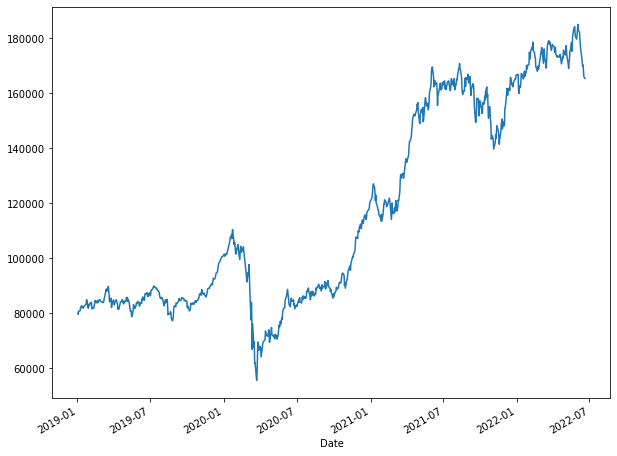

In [121]:
# Criação de uma coluna contendo a variação do nosso patrimônio

PL['PL Total'] = PL.sum(axis = 1)
PL['PL Total'].plot()

In [122]:
# Obtendo dados do IBOV dos benchmarks

benchmarks = yf.download(['^BVSP','USDBRL=X','SPY'], start = inicio, end =  fim)['Adj Close']
benchmarks

[*********************100%***********************]  3 of 3 completed


SPY  USDBRL=X     ^BVSP
Date                                      
2019-01-01         NaN    3.8800       NaN
2019-01-02  236.102310    3.8799   91012.0
2019-01-03  230.468277    3.7863   91564.0
2019-01-04  238.187958    3.7551   91841.0
2019-01-07  240.066025    3.6612   91699.0
...                ...       ...       ...
2022-06-15  377.569031    5.1161  102807.0
2022-06-16  365.072998    5.0520       NaN
2022-06-17  365.859985    5.0522   99825.0
2022-06-20         NaN    5.1521   99853.0
2022-06-21         NaN    5.1872       NaN

[906 rows x 3 columns]

In [123]:
benchmarks.rename(columns = {'SPY': 'S&P500','USDBRL=X': 'DÓLAR','^BVSP': 'IBOV'}, inplace = True)

In [124]:
## Juntando todo num dataframe só 
consolidado = pd.merge(benchmarks, PL, how = 'inner', on = 'Date')
consolidado.head()

S&P500   DÓLAR     IBOV      BRKM5.SA      CPLE6.SA  \
Date                                                                  
2019-01-02  236.102310  3.8799  91012.0   9993.057556   9999.487031   
2019-01-03  230.468277  3.7863  91564.0  10053.043976  10112.932170   
2019-01-04  238.187958  3.7551  91841.0   9941.344757   9779.074158   
2019-01-07  240.066025  3.6612  91699.0   9871.013641   9882.798250   
2019-01-08  242.321487  3.7341  92032.0   9864.808960  10048.105435   

                LEVE3.SA      PETR4.SA     TAEE11.SA      UNIP6.SA  \
Date                                                                 
2019-01-02   9994.100723   9997.454880  10002.744141   9992.855629   
2019-01-03   9968.362761  10242.614082  10031.664551   9873.735092   
2019-01-04   9983.813629  10271.699154  10428.303955   9871.086994   
2019-01-07   9972.225237  10433.753677  10254.774902   9847.263218   
2019-01-08  10099.678288  10371.425629  10246.510986  10125.210033   

                USIM5.SA      VALE3.SA      PL Total  
Date                                                  
2019-01-02   9996.030807  10011.468750  79987.199517  
2019-01-03   9780.951691   9601.917969  79665.222291  
2019-01-04  10354.494095  10227.022461  80856.839203  
2019-01-07  10374.977875  10172.154297  80808.961098  
2019-01-08  10085.108185  10270.131836  81110.979352

In [125]:
consolidado_adj = consolidado/consolidado.iloc[0]
consolidado_adj.head()

S&P500     DÓLAR      IBOV  BRKM5.SA  CPLE6.SA  LEVE3.SA  \
Date                                                                     
2019-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2019-01-03  0.976137  0.975876  1.006065  1.006003  1.011345  0.997425   
2019-01-04  1.008834  0.967834  1.009109  0.994825  0.977958  0.998971   
2019-01-07  1.016788  0.943633  1.007548  0.987787  0.988331  0.997811   
2019-01-08  1.026341  0.962422  1.011207  0.987166  1.004862  1.010564   

            PETR4.SA  TAEE11.SA  UNIP6.SA  USIM5.SA  VALE3.SA  PL Total  
Date                                                                     
2019-01-02  1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  
2019-01-03  1.024522   1.002891  0.988079  0.978484  0.959092  0.995975  
2019-01-04  1.027431   1.042544  0.987814  1.035861  1.021531  1.010872  
2019-01-07  1.043641   1.025196  0.985430  1.037910  1.016050  1.010274  
2019-01-08  1.037407   1.024370  1.013245  1.008911  1.025837  1.014049

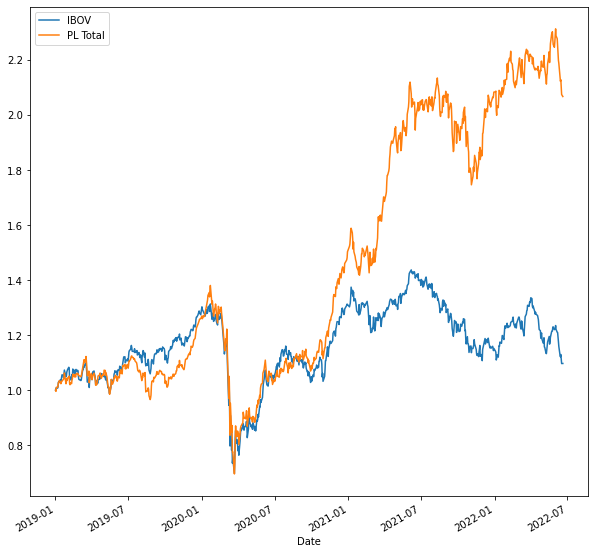

In [126]:
consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (10,10));

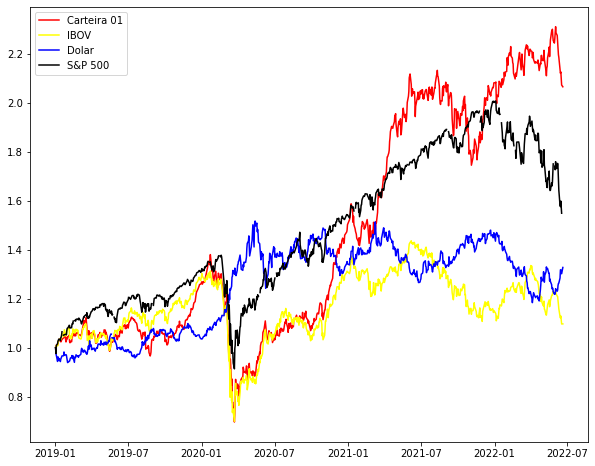

In [131]:
plt.rcParams["figure.figsize"] = (10,8)

plt.plot(consolidado_adj['PL Total'], color = "red")

plt.plot(consolidado_adj['IBOV'], color = "yellow")

plt.plot(consolidado_adj['DÓLAR'], color = "blue")

plt.plot(consolidado_adj['S&P500'], color="black")

nomes = ['Carteira 01', 'IBOV', 'Dolar', 'S&P 500']

plt.legend(nomes);

plt.show()